In [130]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt
import time

In [131]:
fi = FlorisInterface("floris_examples/inputs/gch.yaml")
fi_cc = FlorisInterface("floris_examples/inputs/cc.yaml")
D = 126

In [132]:

N_turb = 100
N_average = 5


In [133]:
# FOR GCH
avg_times_GCH = []
turbines_GCH = []
for i in range(1,N_turb):

    


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        

        fi.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        start = time.perf_counter()

        fi.calculate_wake(yaw_angles=np.random.randn(1,1,i))

        end = time.perf_counter()

        #powers = fi.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_GCH.append(avg_time)
    turbines_GCH.append(i)

avg_times_GCH = np.array(avg_times_GCH)
turbines_GCH = np.array(turbines_GCH)


In [134]:
# FOR CC

avg_times_CC = []
turbines_CC = []
for i in range(1,N_turb):


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi_cc.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        fi_cc.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        start = time.perf_counter()

        fi_cc.calculate_wake(yaw_angles=np.random.randn(1,1,i))

        end = time.perf_counter()

        #powers = fi_cc.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_CC.append(avg_time)
    turbines_CC.append(i)

avg_times_CC = np.array(avg_times_CC)
turbines_CC = np.array(turbines_CC)


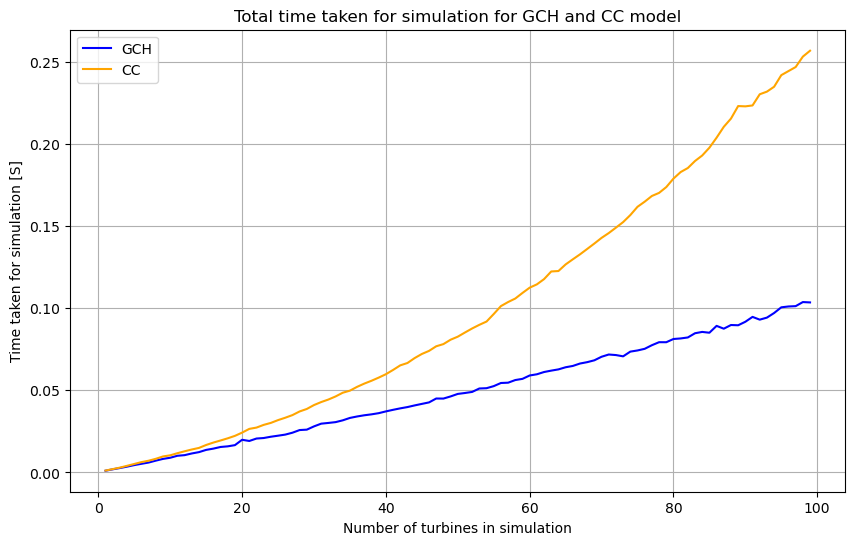

In [135]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.plot(turbines_GCH, avg_times_GCH, label="GCH", c="b")
plt.plot(turbines_CC, avg_times_CC, label="CC", c="orange")
plt.legend()
plt.grid()
plt.xlabel("Number of turbines in simulation")
plt.ylabel("Time taken for simulation [S]")
plt.title("Total time taken for simulation for GCH and CC model")
plt.show()

fig.savefig('Plots/Appendix_1/timeplot.png', dpi=150)

In [136]:
for i in range(20):
    print(f"For {turbines_CC[i]} turbines the avg time:  GCH {avg_times_GCH[i]:.3f} s  | CC {avg_times_CC[i]:.3f} s ")

For 1 turbines the avg time:  GCH 0.001 s  | CC 0.001 s 
For 2 turbines the avg time:  GCH 0.002 s  | CC 0.002 s 
For 3 turbines the avg time:  GCH 0.003 s  | CC 0.003 s 
For 4 turbines the avg time:  GCH 0.004 s  | CC 0.004 s 
For 5 turbines the avg time:  GCH 0.004 s  | CC 0.005 s 
For 6 turbines the avg time:  GCH 0.005 s  | CC 0.006 s 
For 7 turbines the avg time:  GCH 0.006 s  | CC 0.007 s 
For 8 turbines the avg time:  GCH 0.007 s  | CC 0.008 s 
For 9 turbines the avg time:  GCH 0.008 s  | CC 0.010 s 
For 10 turbines the avg time:  GCH 0.009 s  | CC 0.010 s 
For 11 turbines the avg time:  GCH 0.010 s  | CC 0.012 s 
For 12 turbines the avg time:  GCH 0.011 s  | CC 0.013 s 
For 13 turbines the avg time:  GCH 0.012 s  | CC 0.014 s 
For 14 turbines the avg time:  GCH 0.012 s  | CC 0.015 s 
For 15 turbines the avg time:  GCH 0.014 s  | CC 0.017 s 
For 16 turbines the avg time:  GCH 0.015 s  | CC 0.018 s 
For 17 turbines the avg time:  GCH 0.016 s  | CC 0.019 s 
For 18 turbines the avg

In [138]:
percentage_inc = []

for i in range(len(avg_times_GCH)):
    percentage_inc.append((avg_times_CC[i]-avg_times_GCH[i])/(avg_times_GCH[i])*100)

percentage_inc = np.array(percentage_inc)
    

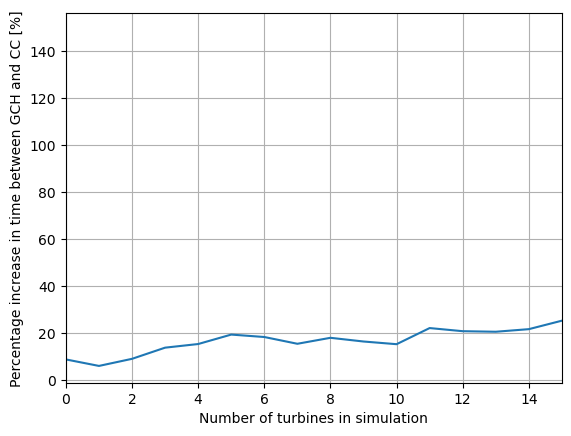

In [144]:
plt.plot(percentage_inc)
plt.grid()
plt.xlabel("Number of turbines in simulation")
plt.ylabel("Percentage increase in time between GCH and CC [%]")
plt.xlim([0, 15])
plt.show()